<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
Crop Prediction Using KNN
</div>
<div style="background-color: #303030;text-align:right;padding: 10px;font-size: 16px;color:white;">
#Name
</div>

K nearest neighbors or KNN algorithm is non-parametric, lazy learning, supervised algorithm used for classification as well as regression. KNN is often used when searching for similar items, such as finding items similar to this one. The Algorithm suggests that you are one of them because you are close to your neighbors.

# How does a KNN algorithm work?

To conduct grouping, the KNN algorithm uses a very basic method to perform classification. When a new example is tested, it searches at the training data and seeks the k training examples which are similar to the new test example.  It then assigns to the test example of the most similar class label.

# IMPORTING REQUIRED LIBRARIES

In [39]:
#importing required libraries & dataset for the project
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn import datasets

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# IMPORTING DATASET & VISUALIZATION

In [2]:
data = pd.read_csv("./Crop_recommendation.csv")   #importing files using pandas
data.head(10)    #shows top 10 dataset items

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
5,69,37,42,23.058049,83.370118,7.073454,251.055000,rice
6,69,55,38,22.708838,82.639414,5.700806,271.324860,rice
7,94,53,40,20.277744,82.894086,5.718627,241.974195,rice
8,89,54,38,24.515881,83.535216,6.685346,230.446236,rice
9,68,58,38,23.223974,83.033227,6.336254,221.209196,rice


In [3]:
# Dataset dimensions - (rows, columns)
data.shape

(2200, 8)

In [4]:
data.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [5]:
data.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
data.isnull().sum()        

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [8]:
print(data.groupby('label').size())   #categorizes data based on label

label
apple          100
banana         100
blackgram      100
chickpea       100
coconut        100
coffee         100
cotton         100
grapes         100
jute           100
kidneybeans    100
lentil         100
maize          100
mango          100
mothbeans      100
mungbean       100
muskmelon      100
orange         100
papaya         100
pigeonpeas     100
pomegranate    100
rice           100
watermelon     100
dtype: int64


# Observations:

1. There are a total of 2200 records and 8 features in the dataset.
2. Each feature can be either of integer or float dataype.
3. No features have zero values which represent missing data.
4. There are zero NaN values in the dataset.

<div style="background-color: blue;text-align:center;padding: 20px;font-size: 16px;color:white;">
DATA PRE-PROCESSING
</div>

In [10]:
#visualize columns
data.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [12]:
#converting categorical to numerical data (incase of categorical data)
cat_cols=[ 'label']
le=preprocessing.LabelEncoder()
data['label']=data[cat_cols].apply(le.fit_transform)

In [15]:
data

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,5
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,5
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,5
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,5


In [16]:
 #Feature scaling using MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#sc = MinMaxScaler(feature_range = (0, 1))
#dataset_scaled = sc.fit_transform(dataset_new)

<div style="background-color: red;text-align:center;padding: 20px;font-size: 16px;color:white;">
FEATURE IMPORTANCE
</div>

A heatmap is a graphical representation of data that uses a system of color-coding to represent different values.

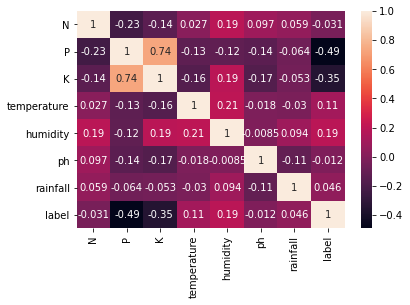

In [19]:
# Heatmap
import seaborn as sns
sns.heatmap(data.corr(), annot = True)
plt.show()

From the correaltion heatmap, we can see that there is a high correlation between label and [p,k] . We can select these features to accept input from the user and predict the outcome.

<div style="background-color:orange;text-align:center;padding: 20px;font-size: 16px;color:black;">
VISUALIZING CLUSTERS
</div>

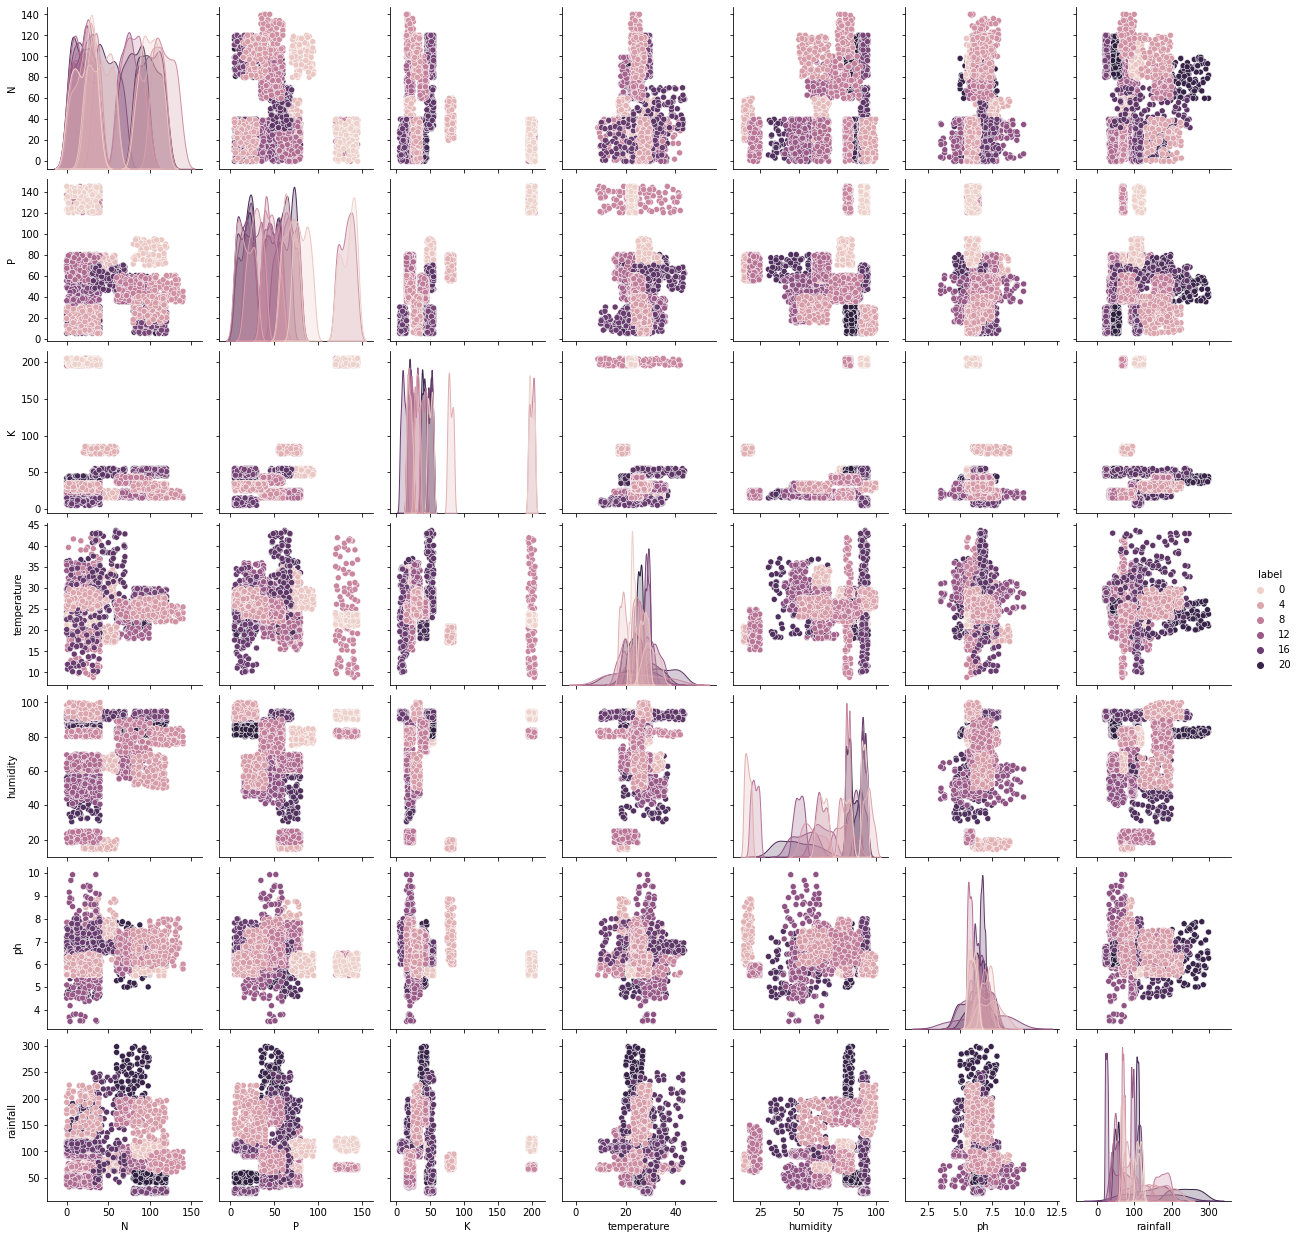

In [20]:
# Detailed distribution of the features in the dataset
sns.pairplot(data=data, hue='label')
plt.show()

In [25]:
## separting target class
target  = data.iloc[:, data.columns == 'label']

In [32]:
data1 = data[['P','K']]

In [29]:
target.shape

(2200, 1)

In [33]:
data1.shape

(2200, 2)

<div style="background-color: green;text-align:center;padding: 20px;font-size: 16px;color:white;">
FITTING THE MODEL KNN
</div>

In [35]:
## splitting the data into training and test sets 
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(data1, target,test_size = 0.3, random_state = 524)

In [36]:
## shape of train and test objects 
print(X_train.shape)
print(X_test.shape)

(1540, 2)
(660, 2)


In [37]:
## shape of y objects
print(y_train.shape)
print(y_test.shape)

(1540, 1)
(660, 1)


In [55]:
 ## Import ‘KNeighborsClassifier’ class from sklearn
from sklearn.neighbors import KNeighborsClassifier
## import metrics model to check the accuracy
from sklearn import metrics
#using loop from k = 1 to k = 40 and record testing accuracy
k_range = range(1,40)
scores = {}
score_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    score_list.append(metrics.accuracy_score(y_test, y_pred))

In [46]:
score_list

[0.4818181818181818,
 0.49393939393939396,
 0.49242424242424243,
 0.5015151515151515,
 0.49242424242424243,
 0.48333333333333334,
 0.4893939393939394,
 0.48787878787878786,
 0.48333333333333334,
 0.4863636363636364,
 0.4863636363636364,
 0.48333333333333334,
 0.47878787878787876,
 0.4863636363636364,
 0.4803030303030303,
 0.48787878787878786,
 0.4803030303030303,
 0.49696969696969695,
 0.49393939393939396,
 0.47575757575757577,
 0.47575757575757577,
 0.47878787878787876,
 0.4803030303030303,
 0.4893939393939394,
 0.47878787878787876,
 0.4696969696969697,
 0.47575757575757577,
 0.47878787878787876,
 0.47878787878787876,
 0.4803030303030303,
 0.47424242424242424,
 0.4909090909090909,
 0.4984848484848485,
 0.4893939393939394,
 0.5015151515151515,
 0.5045454545454545,
 0.48484848484848486,
 0.4863636363636364,
 0.48787878787878786]

In [53]:
score_list[35]

0.5045454545454545

# Plot relation between k and testing accuracy

Text(0, 0.5, 'Testing accuracy')

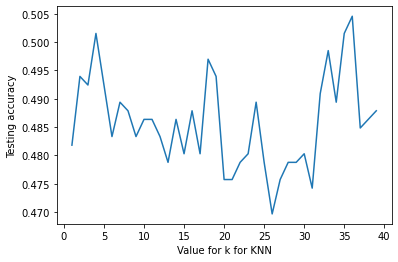

In [47]:
plt.plot(k_range, score_list)
plt.xlabel('Value for k for KNN')
plt.ylabel('Testing accuracy')

In [59]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=35)
model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=35)

In [60]:
#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [63]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Model Accuracy, how often is the classifier correct?
print("Test Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Train Accuaracy",score_list[35])

Test Accuracy: 0.48787878787878786
Train Accuaracy 0.5045454545454545


     label
0       20
1       20
2       20
3       20
4       20
..     ...
495     18
496     18
497     18
498     18
499     18

[500 rows x 1 columns]
